<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Recognize_VietNamses_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [123]:
#Kết nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/VIETNAMESE_FOOD/'

In [125]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('banhbao'):
        output=0.0
      if file.startswith('banhchung'):
        output=1.0
      if file.startswith('banhmi'):
        output=2.0
      if file.startswith('banhxeo'):
        output=3.0
      if file.startswith('comtam'):
        output=4.0
      if file.startswith('keocudo'):
        output=5.0
      if file.startswith('nemcuon'):
        output=6.0
      if file.startswith('pho'):
        output=7.0
      if file.startswith('thitluoc'):
        output=8.0
      if file.startswith('xoigac'):
        output=9.0

      photo = load_img(folder+file,target_size=(150,150))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

In [126]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/photo_dish.npy',photos)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/label_dish.npy',labels)
#Kiểm tra kích thước
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (2000, 150, 150, 3)
kich thuoc labels (2000,)


In [127]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (1600, 150, 150, 3)
kich thuoc test_x (400, 150, 150, 3)


In [128]:
#Scale lại data
train_x = train_x.astype('float32')
train_x = train_x/255
     
test_x = test_x.astype('float32')
test_x = test_x/255

In [129]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [130]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (1600, 150, 150, 3)
kich thuoc train_labels (1600, 10)


In [131]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(150,150,3),padding='same'))
     
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [132]:
classes = 10

model.add(Flatten())
     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                 

In [134]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 20

train = model.fit(train_x,train_labels,batch_size, epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, test_labels)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
25/25 [==============================] - 3s 65ms/step - loss: 4.0527 - accuracy: 0.1881
Epoch 2/20
25/25 [==============================] - 2s 65ms/step - loss: 1.8083 - accuracy: 0.3787
Epoch 3/20
25/25 [==============================] - 2s 62ms/step - loss: 1.4875 - accuracy: 0.4975
Epoch 4/20
25/25 [==============================] - 2s 65ms/step - loss: 1.2836 - accuracy: 0.5569
Epoch 5/20
25/25 [==============================] - 2s 64ms/step - loss: 1.0377 - accuracy: 0.6619
Epoch 6/20
25/25 [==============================] - 2s 65ms/step - loss: 0.7421 - accuracy: 0.7556
Epoch 7/20
25/25 [==============================] - 2s 64ms/step - loss: 0.5520 - accuracy: 0.8238
Epoch 8/20
25/25 [==============================] - 2s 65ms/step - loss: 0.3344 - accuracy: 0.8944
Epoch 9/20
25/25 [==============================] - 2s 70ms/step - loss: 0.1724 - accuracy: 0.9594
Epoch 10/20
25/25 [==============================] - 2s 70ms/step - loss: 0.1271 - accuracy: 0.9719
Epoch 11/

In [135]:
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/dish_detection.h5')


1/1 [==============================] - 0s 222ms/step
Kết quả là banhbao


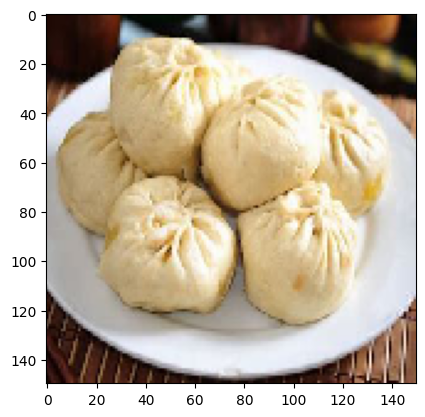

In [137]:
#test mo hinh

import matplotlib.pyplot as plt
import numpy as np

labels = ['banhbao', 'banhchung','banhmi','banhxeo','comtam','keocudo','nemcuon','pho','thitluoc','xoigac']

img = load_img("/content/drive/My Drive/IMAGES/BANHBAO.jpg", target_size = (150,150))
plt.imshow(img)
#Chuyển ảnh sang mảng
img = img_to_array(img)
img = img.reshape(1, 150,150,3)
img = img.astype('float32')
img = img /255 # Chuyển về [0, 1]

predict_label = labels[np.argmax(model.predict(img))]
print('Kết quả là {}'.format(predict_label))